In [22]:
import requests
import pandas as pd

# URL da API da CoinGecko para obter preços de criptomoedas
url = "https://api.coingecko.com/api/v3/coins/markets"
parametros = {
    'vs_currency': 'BRL',  # Moeda de conversão
    'per_page': 30,  # Número de criptomoedas para buscar (ajuste conforme necessário)
}

# Fazendo a requisição para a API
response = requests.get(url, params=parametros)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
    
    # Convertendo os dados em um DataFrame do pandas
    df = pd.DataFrame(data)
    
    # Selecionando colunas de interesse
    df = df[['id', 'symbol', 'name', 'current_price', 'market_cap', 'total_volume']]
    
    # Salvando o DataFrame em um arquivo CSV
    df.to_csv('cryptocurrencies.csv', index=False)
    
    print("Dados salvos em cryptocurrencies.csv")
else:
    print(f"Erro na requisição: {response.status_code}")


Dados salvos em cryptocurrencies.csv


In [23]:
display(df)

,id,symbol,name,current_price,market_cap,total_volume
0,bitcoin,btc,Bitcoin,573635.000000,11366110056732,116905462470
1,ethereum,eth,Ethereum,19781.200000,2385859084511,62578527439
2,ripple,xrp,XRP,15.240000,876495767648,30480691980
3,tether,usdt,Tether,6.110000,839073421153,226028331184
4,binancecoin,bnb,BNB,4221.450000,616049531954,1925916597
5,solana,sol,Solana,1141.380000,552905399179,11239792443
6,dogecoin,doge,Dogecoin,2.040000,300524836282,9182369289
7,usd-coin,usdc,USDC,6.110000,279439599279,21217424255
8,cardano,ada,Cardano,5.890000,211627039715,7059816737
9,staked-ether,steth,Lido Staked Ether,19773.540000,190111538647,143585024


In [24]:
from datetime import datetime, timedelta
from IPython.display import display
import pandas as pd

# Função para buscar dados gerais de uma criptomoeda específica
def get_crypto_data(crypto_name):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    parametros = {
        'vs_currency': 'usd',
        'ids': crypto_name,
        'sparkline': False
    }
    
    response = requests.get(url, params=parametros)
    
    if response.status_code == 200:
        data = response.json()
        if data:  # Verifica se a resposta contém dados
            df = pd.DataFrame(data)
            df = df[['id', 'symbol', 'name', 'current_price', 'market_cap', 'total_volume']]
            return df
        else:
            print(f"Nenhum dado encontrado para a criptomoeda '{crypto_name}'")
            return None
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None


# Função para buscar o histórico de preços de uma criptomoeda específica nos últimos 365 dias
def get_crypto_history(crypto_name):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_name}/market_chart"
    parametros = {
        'vs_currency': 'BRL',
        'days': '365'
    }
    
    response = requests.get(url, params=parametros)
    
    if response.status_code == 200:
        data = response.json()
        if 'prices' in data:
            prices = data['prices']
            # Convertendo a lista de preços em um DataFrame
            df_prices = pd.DataFrame(prices, columns=['timestamp', 'price'])
            # Convertendo timestamps para datas legíveis
            df_prices['date'] = pd.to_datetime(df_prices['timestamp'], unit='ms').dt.date
            df_prices = df_prices[['date', 'price']]
            return df_prices
        else:
            print(f"Nenhum histórico de preços encontrado para a criptomoeda '{crypto_name}'")
            return None
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None

# Solicitando o nome da criptomoeda ao usuário
crypto_name = input("Digite o nome ou símbolo da criptomoeda: ")

# Buscando os dados gerais
df_general = get_crypto_data(crypto_name)

# Buscando o histórico de preços dos últimos 365 dias
df_history = get_crypto_history(crypto_name)



if df_general is not None:
    display(df_general)


if df_history is not None:
    display(df_history)
    # Salvando o DataFrame em um arquivo CSV
    df_history.to_csv(f'{crypto_name}_history.csv', index=False)
    print(f"Histórico de preços salvo em {crypto_name}_history.csv")

,id,symbol,name,current_price,market_cap,total_volume
0,stellar,xlm,Stellar,0.422165,12826049762,350137817


,date,price
0,2024-01-14,0.582395
1,2024-01-15,0.572708
2,2024-01-16,0.574018
3,2024-01-17,0.583857
4,2024-01-18,0.585647
...,...,...
361,2025-01-09,2.604177
362,2025-01-10,2.365241
363,2025-01-11,2.542641
364,2025-01-12,2.728493


Histórico de preços salvo em stellar_history.csv


In [25]:

# Converter a coluna 'date' para o formato datetime
df_history['date'] = pd.to_datetime(df_history['date'])

# Encontrar a linha com o maior preço
max_price_row = df_history.loc[df_history['price'].idxmax()]

# Encontrar a linha com o menor preço
min_price_row = df_history.loc[df_history['price'].idxmin()]

# Exibir os resultados
print("Maior preço:")
print(max_price_row)
print("\nMenor preço:")
print(min_price_row)


Maior preço:
date     2024-12-02 00:00:00
price               3.340693
Name: 323, dtype: object

Menor preço:
date     2024-07-08 00:00:00
price               0.458426
Name: 176, dtype: object


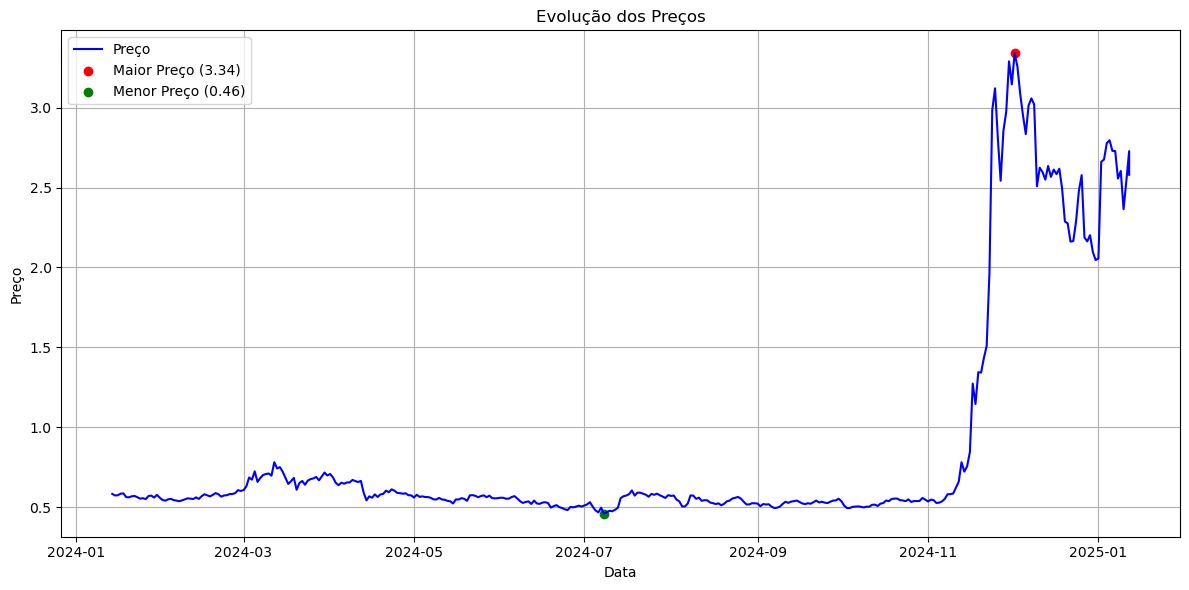

In [26]:
import matplotlib.pyplot as plt

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(df_history['date'], df_history['price'], label='Preço', color='blue')

# Destacando o maior e menor preço no gráfico
plt.scatter(max_price_row['date'], max_price_row['price'], color='red', label=f"Maior Preço ({max_price_row['price']:.2f})")
plt.scatter(min_price_row['date'], min_price_row['price'], color='green', label=f"Menor Preço ({min_price_row['price']:.2f})")

# Configurações do gráfico
plt.title('Evolução dos Preços')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
